In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df= pd.read_csv('/kaggle/input/std-infection-rates-in-america-1996-2008/STD Cases.csv')
df.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/std-infection-rates-in-america-1996-2008/STD Cases.csv


,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


In [2]:
df.shape


(42680, 11)

<AxesSubplot:xlabel='Gender', ylabel='STD Cases'>

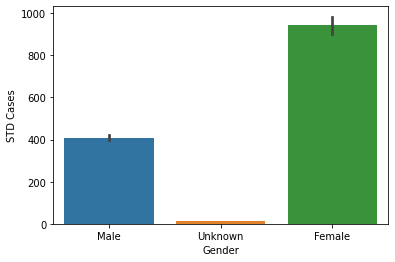

In [3]:
import seaborn as sns
sns.barplot(x='Gender',y='STD Cases', data= df)


<AxesSubplot:xlabel='Disease', ylabel='STD Cases'>

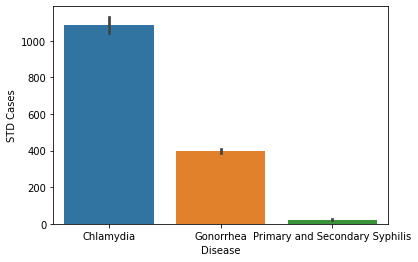

In [4]:
sns.barplot(x='Disease', y='STD Cases',data= df)

Of the 3 STDs chlamydia is the most common to occur amongst individuals.

In [6]:
#drop state after filling Nan for population and rate 
df.drop(['index','Disease','Age'], axis= 1,inplace= True)
df.head()

,Disease Code,State,Year,Gender,Age Code,STD Cases,Population,Rate per 100K
0,274.0,Alabama,1996.0,Male,0-14,25.0,468394.0,5.34
1,274.0,Alabama,1996.0,Male,15-19,164.0,165920.0,98.84
2,274.0,Alabama,1996.0,Male,20-24,193.0,152848.0,126.27
3,274.0,Alabama,1996.0,Male,25-29,88.0,152778.0,57.60
4,274.0,Alabama,1996.0,Male,30-34,55.0,155850.0,35.29


In [7]:
df.isna().sum()

Disease Code      150
State             150
Year              150
Gender            150
Age Code          150
STD Cases         150
Population       7197
Rate per 100K    7197
dtype: int64

In [5]:
def removePopulationNaN(states: list, state_tables=[]):
    
    for state in states:
        state_df= df[df['State']==state].copy() # to avoid SetWithCopyWarning
        state_df['Population'].fillna(state_df['Population'].mean(),inplace=True)
        state_df['Rate per 100K'].fillna(state_df['Rate per 100K'].mean(),inplace=True)
        state_tables.append(state_df)
    final_df= pd.concat(state_tables)    
    print(len(final_df)) 
    return final_df
df2= removePopulationNaN(df.State.unique())

42530


In [6]:
#checking again for nan after applying function
df2.isna().sum()

Disease Code     0
State            0
Year             0
Gender           0
Age Code         0
STD Cases        0
Population       0
Rate per 100K    0
dtype: int64

In [7]:
df2.Gender.unique(), df2['Age Code'].unique()

(array(['Male', 'Unknown', 'Female'], dtype=object),
 array(['0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+', '99'],
       dtype=object))

In [8]:
df2.describe()

,Disease Code,Year,STD Cases,Population,Rate per 100K
count,42530.000000,42530.000000,42530.000000,4.253000e+04,42530.000000
mean,283.795533,2005.240607,603.133647,4.677174e+05,328.060101
std,13.723063,5.431696,1973.091099,7.369687e+05,638.634667
min,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,274.000000,2001.000000,8.000000,1.020600e+05,9.980000
50%,280.000000,2005.000000,59.000000,2.154960e+05,117.500000
75%,280.000000,2010.000000,380.000000,5.072790e+05,355.992763
max,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


In [9]:
df2.head()

,Disease Code,State,Year,Gender,Age Code,STD Cases,Population,Rate per 100K
0,274.0,Alabama,1996.0,Male,0-14,25.0,468394.0,5.34
1,274.0,Alabama,1996.0,Male,15-19,164.0,165920.0,98.84
2,274.0,Alabama,1996.0,Male,20-24,193.0,152848.0,126.27
3,274.0,Alabama,1996.0,Male,25-29,88.0,152778.0,57.60
4,274.0,Alabama,1996.0,Male,30-34,55.0,155850.0,35.29


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df2.drop(columns=['Disease Code']),df2['Disease Code'],
                                                                   test_size=0.3, random_state=40)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29771, 7), (12759, 7), (29771,), (12759,))

In [12]:
X_train.head()

,State,Year,Gender,Age Code,STD Cases,Population,Rate per 100K
32963,Georgia,2005.0,Female,15-19,3031.0,314220.0,964.61
13455,Tennessee,2005.0,Male,25-29,714.0,209140.0,341.40
2549,Kentucky,2004.0,Male,25-29,290.0,142263.0,203.85
35512,Nevada,2002.0,Female,35-39,55.0,80268.0,68.52
2987,Maryland,2002.0,Male,40+,141.0,1107591.0,12.73


In [13]:
X_train.State.nunique()

51

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [15]:
trf1= ColumnTransformer([
    ('ohe_state_gender_ageCode',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,2,3])
], remainder='passthrough')

In [16]:
trf2= ColumnTransformer([
   ('standard_scaler', StandardScaler(), slice(0,66))
])

In [17]:

trf3= RandomForestClassifier(n_estimators=1000)

# Creating Pipeline

In [18]:
from sklearn.pipeline import make_pipeline, Pipeline

In [19]:
pipe_mp = make_pipeline(trf1,trf2,trf3)

In [20]:
type(X_train), type(y_train.to_frame())

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [22]:
pipe_mp.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_state_gender_ageCode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 2, 3])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  slice(0, 66, None))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000))])

In [23]:
pipe_mp.score(X_test, y_test)

0.8527314052825457